# Sơ lược thuật toán Huffman

- Được phát minh bởi David A. Huffman năm 1952
- Được sử dụng để nén dữ liệu không mất mát \(lossless\) dựa trên tần số xuất hiện của các ký tự.
- Thuật toán Huffman là một thuật toán mã hóa thông tin dùng để nén dữ liệu dựa trên bảng tần suất xuất hiện của các ký tự trong dữ liệu đầu vào.
- Thuật toán Huffman xây dựng một bộ mã nhị phân cho các ký tự sao cho dung lượng sau khi mã hóa là nhỏ nhất. Các ký tự có tần suất xuất hiện cao sẽ có độ dài từ mã ngắn hơn, và ngược lại.
- Thuật toán Huffman sử dụng một cấu trúc dữ liệu gọi là cây nhị phân để biểu diễn bộ mã. Các nút lá của cây chứa các ký tự và tần suất của chúng, còn các nút nhánh chứa tổng tần suất của hai nút con. Các cây con của nút được quy ước là trái \- 0 và phải \- 1 để tạo thành từ mã cho ký tự tương ứng.
- Thuật toán Huffman là một thuật toán tham lam, vì nó luôn chọn hai nút có tần suất thấp nhất để ghép lại thành một nút mới. Quá trình này được lặp lại cho đến khi chỉ còn một nút duy nhất là gốc của cây.

# Triển khai thuật toán Huffman

## Các bước của thuật toán Huffman:

### Sinh bảng Huffman

- Bước 1: Duyệt cây và biểu diển theo dạng post-prefix. nút trái biểu diễn bằng 0, nút phải biểu diễn bằng 1
- Bước 2: Đếm số nút trên cây trừ nút gốc
- Bước 3: Tại các nút lá ta lưu lại kí tự theo post-prefix

Giả sử có cây Root[Left: [Node a] Right [Node Left[Node b] Right[Node c] ] thì số nút sẽ là 5, Thứ tự duyệt cây post-prefix không tính nút gốc là 0101, danh sách nút lá là abc. Thường cả đoạn này sẽ được chuyển sang nhị phân

### Mã hóa

- Bước 1: Tính tần số xuất hiện của mỗi ký tự trong chuỗi cần mã hóa và tạo một danh sách các nút lá, mỗi nút lá chứa một ký tự và tần số của nó.
- Bước 2: Sắp xếp danh sách các nút lá theo thứ tự tăng dần của tần số và lấy hai nút có tần số nhỏ nhất để tạo một nút cha mới, có giá trị bằng tổng tần số của hai nút con. Gán nhãn nút con trái là 0 và nút con phải là 1. Thêm nút cha vào danh sách và loại bỏ hai nút con khỏi danh sách.
- Bước 3: Lặp lại bước 2 cho đến khi chỉ còn một nút duy nhất trong danh sách, đó là nút gốc của cây Huffman. Cây Huffman được xây dựng từ dưới lên bằng cách kết hợp các nút có tần số thấp nhất thành các nhánh mới.
- Bước 4: Duyệt cây Huffman từ gốc đến lá để tạo mã cho mỗi ký tự. Mã của một ký tự là chuỗi các bit biểu diễn đường đi từ gốc đến lá chứa ký tự đó. Tập hợp này được gọi là bảng Huffman. Ví dụ, nếu đường đi từ gốc đến lá chứa ký tự a là 0\-1\-0\-1, thì mã của a là 0101.
- Bước 5: Mã hóa chuỗi ban đầu bằng cách thay thế mỗi ký tự bằng mã tương ứng của nó. Ví dụ, nếu chuỗi ban đầu là "abac" và mã của a là 0, b là 10, c là 11, thì chuỗi mã hóa là "010011".
- Bước 6: Sinh bảng Huffman
- Bước 7: Trả về bảng Huffman và chuỗi đã được mã hóa

### Tạo cây từ bảng Huffman

- Bước 1: Lấy số nút trên cây
- Bước 2: Lấy thứ tự post-prefix trên cây. Chiều dài mảng này luôn nhỏ hơn số nút là 1
- Bước 3: Sinh cây, xét từ vị trí nút gốc:
  - Gặp số 0, chúng ta sẽ thêm 1 cây con vào bên trái và xét tiếp tại nút này
    - Gặp số 1, ta quay lui cho tới khi nào gặp nút cha chưa có cây con phải thì thêm cây con phải và xét nút vừa thêm
- Bước 4: Lấy tất cả nút lá theo thứ tự post-prefix và chèn các kí tự

Như vậy ta đã có được cây hoàn chỉnh

### Giải mã

- Bước 1: Tạo cây Huffman từ bảng Huffman
- Bước 2: Giải mã chuỗi mã hóa bằng cách duyệt cây Huffman từ gốc đến lá theo từng bit trong chuỗi. Nếu bit là 0, chuyển sang nút con trái, nếu bit là 1, chuyển sang nút con phải. Khi gặp một nút lá, lấy ký tự trong nút lá và thêm vào chuỗi giải mã. Quay lại nút gốc và tiếp tục duyệt cho đến khi hết chuỗi mã hóa. Ví dụ, để giải mã chuỗi "010011", ta bắt đầu từ gốc và đi theo các bit như sau: 0 -> trái -> a, 1 - phải -> 0 - trái -> b, 0 - trái -> a, 1 - phải -> 1 - phải -> c. Chuỗi giải mã là "abac".

## Đánh giá thuật toán:

### Ưu điểm:

- Thuật toán Huffman có thể giảm kích thước của dữ liệu bằng cách sử dụng các mã có chiều dài khác nhau cho các ký tự khác nhau. Các ký tự có tần suất xuất hiện cao sẽ được gán các mã ngắn hơn, trong khi các ký tự có tần số xuất hiện thấp sẽ được gán các mã dài hơn.
- Chỉ cần có bảng Huffman là chúng ta có thể giải mã chuỗi mã hóa mà không cần phải tải hết cả đoạn mã hóa để dịch do Huffman giải mã theo từng bit.

### Nhược điểm:

- Nếu tần suất xuất hiện quá thấp hoặc kí tự được biểu diễn bởi số bit ít hơn số bit Huffman cần để biểu diễn thì Huffman sẽ không tối ưu được dung lượng thậm chí là tốn nhiều dữ liệu hơn.


## Cài đặt thuật toán Huffman


### Cài đặt Node

- Node là một nút trong cây Huffman gồm 4 thuộc tính:
  - char: ký tự của nút, mặc định là None. Nếu nút là nút lá thì char sẽ là ký tự của nút, nếu nút là nút cha thì char sẽ là None (Kích thước của nó được gọi là word size)
  - freq: tần số xuất hiện của ký tự, mặc định là None, nếu nút là nút lá thì freq sẽ là tần số của ký tự, nếu nút là nút cha thì freq sẽ là tổng tần số của các nút con
  - left: nút con trái
  - right: nút con phải
- Các hàm trong Node:
  - `__init__`: khởi tạo một nút mới, đã được cài đặt để thỏa mãn các yêu cầu trên
  - Bộ hàm so sánh `__lt__`, `__eq__`, `__gt__`, `__le__`, `__ge__`: so sánh tần số của 2 nút
  - `__str__`, `__repr__`: trả về chuỗi mô tả nút
  - `to_bit`: trả về ba đối tượng
    1. Số nút
    2. Cây Huffman nhị phân, biểu diễn dưới dạng Preorder bit
    3. Các lá Bảng Huffman
  - `leaf`: trả về danh sách các lá của cây.


In [ ]:
class Node:
    def __init__(self, char: str = None, freq: int = None, left=None, right=None, father=None):
        if left is not None or right is not None:
            self.char = None
            self.freq = (left.freq if left is not None else 0) + (right.freq if right is not None else 0)
            self.left = left
            self.right = right
            self.father = father
            if left is not None:
                left.father = self
            if right is not None:
                right.father = self
        else:
            self.char = char
            self.freq = freq
            self.left = None
            self.right = None
            self.father = father

    def __lt__(self, other):
        return self.freq < other.freq

    def __eq__(self, other):
        return self.freq == other.freq

    def __gt__(self, other):
        return self.freq > other.freq

    def __le__(self, other):
        return self.freq <= other.freq

    def __ge__(self, other):
        return self.freq >= other.freq

    def __str__(self):
        return f'Node[({self.char}), left: [{self.left}], right: [{self.right}]]'
    def __repr__(self):
        return str(self)

    def to_table(self):
        node = 0
        tree = ''
        char = []
        if self.char is not None:
            return 1, tree, [self.char]
        else:
            node_l, tree_l, char_l = self.left.to_table() if self.left is not None else (0, '', [])
            node_r, tree_r, char_r = self.right.to_table() if self.right is not None else (0, '', [])
            char = char_l + char_r
            node = node_l + node_r + 1
            if self.left is not None:
                tree += '0' + tree_l
            if self.right is not None:
                tree += '1' + tree_r
            return [node, tree, char]
    def leafs(self):
        if self.left is None and self.right is None:
            return [self]
        else:
            return (self.left.leafs() if self.left is not None else []) + (self.right.leafs() if self.right is not None else [])

### Các hàm hỗ trợ Huffman


- `freq`: đếm tần số xuất hiện của các ký tự trong chuỗi


In [ ]:
def calc_freq(data):
    list_char = {}
    for char in data:
        if char in list_char:
            list_char[char] += 1
        else:
            list_char[char] = 1
    return list_char

- `build_tree`: chuyển dữ liệu thành cây Huffman


In [ ]:
def build_tree(data):
    list_char = calc_freq(data)
    heap = []
    for char, freq in list_char.items():
        heap.append(Node(char, freq))
    while len(heap) > 1:
        heap.sort()
        left = heap.pop(0)
        right = heap.pop(0)
        heap.append(Node(left=left, right=right))
    if heap[0].char is not None:
        return Node(left=heap[0])
    return heap[0]

- `tree_to_dict` chuyển cây Huffman thành bảng mã


In [ ]:
def tree_to_dict(root):
    huffman_dict = {}
    def traverse(node, code):
        if node is None:
            return

        if node.char is not None:
            huffman_dict[node.char] = code
            return

        traverse(node.left, code + '0')
        traverse(node.right, code + '1')

    traverse(root, '')
    return huffman_dict

- `get_code` trả về mã tương ứng với ký tự trong bảng mã


In [ ]:
def get_code(huffman_dict, char):
    for c, code in huffman_dict.items():
        if c == char:
            return code
    return None

- `table_to_tree` chuyển bảng mã thành cây Huffman


In [ ]:
def table_to_tree(code):
    node = code[0] - 1# Lấy số nút trừ root
    preorder=code[1] # Lấy preorder của cây
    # Xây cây
    root = Node()
    current = root 
    for i in range(len(preorder)):
        if preorder[i] == '0':
            current.left = Node()
            current.left.father = current
            current = current.left
        elif preorder[i] == '1':
            current = current.father
            while current.right is not None:
                current = current.father
            current.right = Node()
            current.right.father = current
            current = current.right
    # Chèn kí tự cho nút lá
    leafs = root.leafs()
    for i in range(len(leafs)):
        leafs[i].char = code[2][i]
    return root, code[-1]

### Encode

`encode` chuyển dữ liệu thành chuỗi mã hóa và bảng mã

- Bước 1: Dựng cây Huffman từ dữ liệu
- Bước 2: Chuyển cây Huffman thành bảng mã
- Bước 3: Duyệt dữ liệu, mã hóa từng ký tự


In [ ]:
def encode(data):
    root = build_tree(data)
    huffman_dict = tree_to_dict(root)
    res = ''
    for char in data:
        res += huffman_dict[char]
    res = root.to_table() + [res]
    return res

### Decode

`decode` giải mã chuỗi mã hóa thành dữ liệu

- Bước 1: Chuyển bảng mã thành cây Huffman
- Bước 2: Duyệt chuỗi mã hóa, để đi đến vị trí đích của ký tự trong cây Huffman
- Bước 3: Lấy ký tự tại vị trí đích
- Bước 4: Về nút gốc và lặp lại cho đến khi duyệt hết chuỗi mã hóa


In [ ]:
def decode(code, huffman_tree=None):
    if huffman_tree is None:
        huffman_tree, code = table_to_tree(code)
    current = huffman_tree
    data = ''
    for c in code:
        if c == '0':
            current = current.left
        elif c == '1':
            current = current.right
        if current.char is not None:
            data += current.char
            current = huffman_tree
    return data

### Test

Mỗi kí tự được biểu diễn cố định bởi $f$ bit, số lượng node sẽ được biểu diễn bởi $a$ bit

Như vậy độ dài bit trước khi mã hóa là $f \times n$ ($n$ là độ dài chuỗi)

Độ dài sau khi mã hóa là $a + (o - 1) + f \times m + e$ ($m$ là số chữ cái trong chuỗi, o là số node của cây, e là dãy được mã hóa)

Để thuật toán hiệu quả thì $(n - m) \times f > a + (o - 1) + e$ còn không dữ liệu sau khi nén sẽ bị phình ra bởi việc lưu cây Huffman

Thuật toán có 2 tình huống xấu:

- $n \approx m$, phình thêm $a + (o - 1) + e$ bit do tần suất xuất hiện thấp, xấu nhất n = m.
- $f < \frac{a + (o - 1) + e}{n - m}$, khi đó sẽ có những kí tự phải biểu diễn bằng số bit lớn hơn ban đầu. Nếu $n$ đủ lớn chuỗi vẫn sẽ nén được

Giả sử ta mã hóa chuỗi '1234567890' và bội của nó mỗi kí tự sẽ tính 5 bit, $a = 5$


In [ ]:
def test_function_mini(data):
    data_bit_length = len(data) * 5
    print(f"Sample: {data}")
    print(f"Sample length: {len(data)} x 5 = {data_bit_length}")
    code = encode(data)
    print(f"Code: {code}")
    len_code = 5 + len(code[1]) + len(code[2]) * 5 + len(code[3])
    print(f"Code length: {len_code}")
    print()

test_function_mini(2*'123456789')
test_function_mini(4*'123456789')
test_function_mini(5*'123456789')


Sample: 123456789123456789
Sample length: 18 x 5 = 90
Code: [17, '0001101100110101', ['3', '4', '5', '6', '7', '8', '9', '1', '2'], '1110111100000101001110010111011101111000001010011100101110']
Code length: 124

Sample: 123456789123456789123456789123456789
Sample length: 36 x 5 = 180
Code: [17, '0001101100110101', ['3', '4', '5', '6', '7', '8', '9', '1', '2'], '11101111000001010011100101110111011110000010100111001011101110111100000101001110010111011101111000001010011100101110']
Code length: 182

Sample: 123456789123456789123456789123456789123456789
Sample length: 45 x 5 = 225
Code: [17, '0001101100110101', ['3', '4', '5', '6', '7', '8', '9', '1', '2'], '1110111100000101001110010111011101111000001010011100101110111011110000010100111001011101110111100000101001110010111011101111000001010011100101110']
Code length: 211



Ta thấy lặp lại chuỗi đến 5 lần, $n$ mới đủ lớn để chuỗi được nén hiệu quả

Ở đây sẽ tính 1 kí tự sẽ tính là 32 bit, số lượng node cũng sẽ tính là 32 bit


In [ ]:
def test_function(text, print_result=True):
    print("Sample: ", text) if print_result else None
    sample_bit_length = len(text) * 32
    print(f"Sample length: {len(text)} x 32 = {sample_bit_length}")
    res = encode(text)
    len_res = 32 + len(res[1]) + 32 * len(res[2]) + len(res[-1])
    print("Code length: ", len_res)
    print("Compression ratio: ", sample_bit_length/len_res)
    print()
    print("Decode: ", decode(res)) if print_result else None


2. Tình huống xấu: tần suất xuất hiện thấp


In [ ]:
data = 'abcdefghiklmnopqrstuvwxyz'
test_function(data)
print()
print(calc_freq(data))

Sample:  abcdefghiklmnopqrstuvwxyz
Sample length: 25 x 32 = 800
Code length:  998
Compression ratio:  0.8016032064128257

Decode:  abcdefghiklmnopqrstuvwxyz

{'a': 1, 'b': 1, 'c': 1, 'd': 1, 'e': 1, 'f': 1, 'g': 1, 'h': 1, 'i': 1, 'k': 1, 'l': 1, 'm': 1, 'n': 1, 'o': 1, 'p': 1, 'q': 1, 'r': 1, 's': 1, 't': 1, 'u': 1, 'v': 1, 'w': 1, 'x': 1, 'y': 1, 'z': 1}


Tỉ số nén cho chuỗi `abcdefghiklmnopqrstuvwxyz` là 0.8, độ dài bit từ 800 bit xuống 998 bit, kết quả nén và giải nén không đổi (lossless) nặng hơn ban đầu.


3. Tình huống tốt nhất: dữ liệu dễ nén, các kí tự lặp nhiều


In [ ]:
test_function('aaaaaaaaaaaaaaa')

Sample:  aaaaaaaaaaaaaaa
Sample length: 15 x 32 = 480
Code length:  80
Compression ratio:  6.0

Decode:  aaaaaaaaaaaaaaa


Dữ liệu dễ nén tần suất xuất hiện cao, tỉ lệ nén lên đến 6

4. Trường hợp trung bình


In [ ]:
data = """
Trăm năm trong cõi người ta,
Chữ tài chữ mệnh khéo là ghét nhau.
Trải qua một cuộc bể dâu,
Những điều trông thấy mà đau đớn lòng.
"""
test_function(data, print_result=False)

Sample length: 131 x 32 = 4192
Code length:  2082
Compression ratio:  2.0134486071085496



Đối với dữ liệu trên là một đoạn văn bản, tỉ số nén bao gồm cả từ điển là 2.0 từ hơn 4192 bit xuống 2082 bit

5. Trường hợp stream

Thuật toán Huffman có 1 điểm đặc biệt mà các thuật toán khác không có là nó xử lý theo từng bit một, chỉ cần 1 cây có sẵn chúng ta không cần có hết các bit vẫn có thể giải được, không cần quan tâm bit tiếp theo. Việc này phù hợp cho việc truyền thông tin trực tiếp, không cần phải đợi đến khi có đủ dữ liệu để giải mã như HTTP, SMB, ...
Bên cạnh đó để tiết kiệm dung lượng cho file nén, người ta có thể dùng chung cây. Còn không có cây, không thể giải mã, một hình thức bảo mật.


In [ ]:
import random

tree = build_tree(data)
temp = tree
data = ''
for i in range(101):
    c = random.choice(['0', '1'])
    if c == '0':
        temp = temp.left
    else:
        temp = temp.right
    if temp.char is not None:
        data += temp.char
        temp = tree
    if i % 20 == 0:
        print(f'Step {i//20}:{data}')

Step 0:
Step 1:ngển
Step 2:ngểnộữtà
Step 3:ngểnộữtàđnâ
Step 4:ngểnộữtàđnâấấữc
Step 5:ngểnộữtàđnâấấữcht nk


# Cải tiến

Nếu như chuỗi cần nén có ít chữ cái, ví dụ 1 chuỗi bit toàn 0 và 1 mà mỗi node chúng ta chúng ta lưu 1 kí tự, chuỗi chả được nén lại còn mất thêm dung lượng cho cây và số node

Vậy nên tham lam hơn, thay vì chúng ta chọn 1 kí tự chúng ta có thể chọn 1 cụm kí tự. Và đây là lý do LZ tham gia cùng với Huffman: dùng thuật toán tham lam LZ để tạo các chuỗi con vô cùng hiệu quả

Ở đây mình dùng LZW nhưng cải tiến để nó chia ra kích thước cho mỗi bộ mà mình mong muốn

## Phân chia bằng LZ

Hàm `lzw_split` có hai tham số đầu vào là chuỗi kí tự và kích thước cho mỗi bộ (ở đây mặc định 4 kí tự (128 bit))

Chuẩn bị: 1 mảng trống làm từ điển, 1 chuỗi rỗng a và 1 mảng rỗng làm đầu ra

- Bước 1: Lấy từng kí tự
- Bước 2: Tạo một chuỗi mới gồm chuỗi a và kí tự vừa được lấy và kiểm tra chuỗi đó có trong từ điển chưa
  - Nếu rồi thì gán chuỗi vừa rồi thành chuỗi a rồi chạy tiếp
  - Nếu chưa, ta thêm vào mảng trả về chuỗi a, thêm chuỗi vừa rồi vào từ điển nếu nó nhỏ hơn kích thước từ điển và gán kí tự đang xét vào chuỗi a
- Bước 3: Thêm kí tự còn lại vào mảng encoded

Do đặc trưng của LZ, nó sẽ tạo ra các chuỗi có độ dài tăng dần, có nhiều chuỗi là chuỗi con của 1 chuỗi khác trong dãy, vậy nên để tối ưu, chúng ta sẽ đệ quy để đảm bảo tỉ lệ 60% đầu ra đạt kích thước yêu cầu

Kết quả thu được là một mảng chứa các bộ kí tự


In [ ]:
def lzw_split_0(input_string, word_size = 4, dictionary = None):
    if len(input_string) == 0 or input_string is None:
        return []
    if word_size > len(input_string):
        word_size = len(input_string)
    if dictionary is None:
        dictionary = []
    current_string = []
    encoded = []

    for char in input_string:
        current_string_plus_char = current_string + [char]
        if current_string_plus_char in dictionary:
            current_string = current_string_plus_char
        else:
            encoded.append(current_string) if len(current_string) != 0 else None
            if len(current_string) < word_size:
                dictionary += [current_string_plus_char]
            current_string = [char]
    if current_string:
        encoded.append(current_string)
    return encoded

In [ ]:
lzw_split_0('This is a test string, is a test string',3)

[['T'],
 ['h'],
 ['i'],
 ['s'],
 [' '],
 ['i', 's'],
 [' '],
 ['a'],
 [' '],
 ['t'],
 ['e'],
 ['s'],
 ['t'],
 [' '],
 ['s', 't'],
 ['r'],
 ['i'],
 ['n'],
 ['g'],
 [','],
 [' ', 'i'],
 ['s', ' '],
 ['a', ' '],
 ['t', 'e'],
 ['s', 't'],
 [' ', 's'],
 ['t'],
 ['r', 'i'],
 ['n', 'g']]

In [ ]:
def lzw_split(input_string, word_size = 4, dictionary = None, rate=0.8):
    if len(input_string) == 0 or input_string is None:
        return []
    if word_size > len(input_string):
        word_size = len(input_string)
    if dictionary is None:
        dictionary = []
    current_string = []
    encoded = []

    for char in input_string:
        current_string_plus_char = current_string + [char]
        if current_string_plus_char in dictionary:
            current_string = current_string_plus_char
        else:
            encoded.append(current_string) if len(current_string) != 0 else None
            if len(current_string) < word_size:
                dictionary += [current_string_plus_char]
            current_string = [char]
    if current_string:
        encoded.append(current_string)
    ratio=0
    for i in encoded:
        if len(i) == word_size:
            ratio += 1
    if ratio < len(encoded) // 10 * int(rate * 10):
        encoded = lzw_split(input_string, word_size, dictionary)
    return encoded

In [ ]:
lzw_split('This is a test string, is a test string',3)

[['T', 'h'],
 ['i', 's', ' '],
 ['i', 's', ' '],
 ['a', ' ', 't'],
 ['e', 's'],
 ['t', ' '],
 ['s', 't', 'r'],
 ['i', 'n'],
 ['g', ','],
 [' ', 'i', 's'],
 [' ', 'a'],
 [' ', 't'],
 ['e', 's', 't'],
 [' ', 's', 't'],
 ['r', 'i', 'n'],
 ['g']]

## Encode

Ta sẽ chỉnh lại 1 vài hàm để có thể hoạt động với list


In [ ]:
class Node_Block(Node):
    def to_table(self):
        node = 0
        tree = ''
        char = []
        if self.char is not None:
            return 1, tree, [self.char]
        else:
            node_l, tree_l, char_l = self.left.to_table() if self.left is not None else (0, '', [])
            node_r, tree_r, char_r = self.right.to_table() if self.right is not None else (0, '', [])
            char = char_l + char_r
            node = node_l + node_r + 1
            if self.left is not None:
                tree += '0' + tree_l
            if self.right is not None:
                tree += '1' + tree_r
            return [node, tree, char]

In [ ]:
def calc_freq_list(data):
    list_block = {}
    for block in data:
        subdata = ''.join(block)
        if subdata in list_block:
            list_block[subdata]['freq'] += 1
        else:
            list_block[subdata] = {
                'freq' : 1,
                'char' : block
            }
    return list_block

In [ ]:
def build_tree_list(data):
    list_block = calc_freq_list(data)
    heap = []
    for block in list_block.values():
        heap.append(Node_Block(block['char'], block['freq']))
    while len(heap) > 1:
        heap.sort()
        left = heap.pop(0)
        right = heap.pop(0)
        heap.append(Node_Block(left=left, right=right))
    if heap[0].char is not None:
        return Node_Block(left=heap[0])
    return heap[0]

In [ ]:
def tree_to_dict_block(root):
    def traverse(node, code):
        if node is None:
            return
        elif node.char is not None:
            return [[node.char, code]]
        else:
            return traverse(node.left, code + '0') + traverse(node.right, code + '1')
    return traverse(root, '')

Thêm vào cỡ cửa sổ khi encode


In [ ]:
def encode_block(data,word_size = 4):
    split_block = lzw_split(data,word_size)
    root = build_tree_list(split_block)
    huffman_dict = tree_to_dict_block(root)
    res = ''
    for block in split_block:
        for i in huffman_dict:
            if i[0] == block:
                res += i[1]

    res = [word_size] + root.to_table() + [res]
    return res

Giờ dữ liệu sau khi mã hóa sẽ thêm 1 số nữa là kích thước tối đa của mỗi node sẽ lưu (word size - $w$).

Độ dài sau khi mã hóa là $w + a + (o - 1) + f \times b \times w + e$ với $m$ là số bộ

Để thuật toán hiệu quả thì $(n - b \times w) \times f > a + w + (o - 1) + e$ còn không dữ liệu sau khi nén sẽ bị phình ra bởi việc lưu cây Huffman

Tình huống xấu của thuật toán vẫn tương tự với trước khi cải tiến.

Để thấy được kích thước tối đa mỗi node ảnh hưởng như thế nào, ta sẽ vẽ đồ thị. $a, w, f$ sẽ tạm tính 32 bit


In [ ]:
import matplotlib.pyplot as plt
a,W,f = 32,32,32

data = 100 * """
Lorem ipsum dolor sit amet, consectetur adipiscing elit. In sed erat vitae nunc mattis pretium eu ultricies turpis. Quisque a suscipit enim. Nullam tristique diam eu risus tincidunt ultrices. Quisque gravida nisi a porta euismod. Nam tincidunt pellentesque purus eu dapibus. Sed luctus ac dui eget cursus. Quisque quis velit vel neque mattis elementum.

Integer et tortor a tortor rhoncus dignissim vitae ut nunc. Nulla in varius eros. Maecenas eget aliquam risus, sit amet vestibulum diam. Maecenas luctus arcu odio, eu maximus enim vehicula eu. Fusce et commodo ante. Proin consectetur elit vel quam faucibus gravida. Duis lorem arcu, dictum ut bibendum ut, fringilla ac tellus. Praesent posuere augue in suscipit varius. Vestibulum mi nibh, venenatis a felis in, sollicitudin viverra magna. Vivamus quis erat arcu. Pellentesque nec bibendum ex, vitae tempor mauris. Aliquam erat volutpat. Donec luctus non risus id suscipit. Maecenas efficitur sem porta est fermentum hendrerit.

Praesent pulvinar mattis gravida. Nunc tincidunt a quam ut aliquet. Ut nec libero eget dolor ornare vestibulum. Vivamus at orci purus. Aenean eget enim dapibus, elementum velit eget, tempor purus. Cras efficitur dignissim ipsum eu lobortis. Nulla congue vestibulum pharetra. Praesent sit amet hendrerit tortor. Sed porttitor quam egestas quam fermentum, ut fringilla dui molestie. Nullam est leo, tincidunt eget consectetur ac, aliquam in massa.

Praesent vel mauris neque. Quisque varius sed metus at gravida. Fusce condimentum purus ac sem lobortis venenatis. Ut interdum nisi nibh, sed malesuada justo pretium eu. Proin efficitur gravida aliquam. Praesent eu commodo velit, eu cursus diam. Donec et ante ut nibh laoreet congue sed in sapien. Vestibulum blandit semper sapien vel cursus. Mauris feugiat dolor nec imperdiet mollis. Cras vulputate vitae neque maximus sagittis. Duis ultricies lobortis gravida. Cras nec risus ac augue hendrerit blandit. Nam diam metus, dignissim id lacus eget, euismod dignissim massa. Nullam et mi vestibulum lacus consectetur convallis vitae et dolor.

Maecenas sit amet facilisis nisi, vel porta risus. Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Quisque eu ante quis lectus sollicitudin posuere et in justo. Nam sapien eros, suscipit eget felis id, efficitur pulvinar felis. Suspendisse rhoncus, eros et placerat sagittis, diam ipsum sagittis justo, quis dictum libero sapien eu neque. Donec ultricies consectetur enim sodales maximus. Phasellus at rutrum arcu, a fermentum dolor. Nulla condimentum sem dui, non rutrum leo iaculis a. Maecenas id scelerisque lorem, ac tempus est. Etiam sit amet venenatis massa. Vestibulum tempor finibus ligula non efficitur. Fusce eu ligula ut metus bibendum tincidunt vitae in enim.
"""

word_size = [0]
length = [len(data)*f]

for i in range(1, 6):
    res = encode_block(data, i)
    word_size.append(i)
    length.append(a + W + len(res[2]) + res[0]*len(res[3])*f + len(res[4]))

In [ ]:
plt.plot(word_size, length)
plt.xlabel('Word Size')
plt.ylabel('Size')
plt.xlim(0, 5)

Qua hình ta thấy word size = 3 đang là tốt nhất.

Với mỗi dữ liệu, chúng ta sẽ cần 1 word size phù hợp. Word size càng nhỏ các tập sẽ càng lặp nhiều thì tần số của các block sẽ càng lớn. Còn nếu word size càng lớn thì các tập sẽ càng khác nhau thì tần số của các block sẽ càng thấp (Không khác gì việc giết gà dùng dao mổ trâu).

Ta có bài toán tối ưu: Tìm $w$ sao cho $w + a + (o - 1) + f \times |b| \times w + e$ là nhỏ nhất với $|b_i| \leq w, n = \sum |b_i|$, b là tập không lặp của bộ các $b_i$.

Nhưng không, chưa ai giải được bài toán trên hết, muốn biết cỡ nào tốt nhất, hiện tại chúng ta phải thử. Các phần mềm sẽ cho chọn word size. 

Ví dụ: 7zip với mã hóa Deflate được kết hợp từ LZ77 và Huffman. Word size mặc định 32 bit tương đương 1 kí tự UTF-8

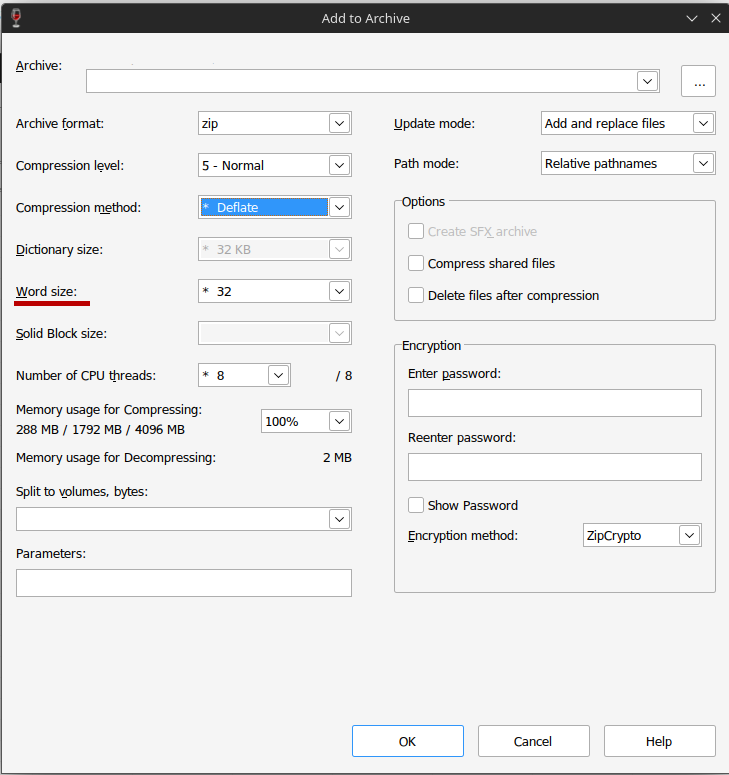

## Giải nén
Sửa lại 1 chút hàm `table_to_tree` và hàm `decode` để hoạt động với đoạn mã hóa mới được trả về từ `encode_block`

In [ ]:
def table_to_tree_block(code):
    wordsize = code[0]
    node = code[1] - 1# Lấy số nút trừ root
    preorder=code[2] # Lấy preorder của cây
    # Xây cây
    root = Node()
    current = root 
    for i in range(len(preorder)):
        if preorder[i] == '0':
            current.left = Node()
            current.left.father = current
            current = current.left
        elif preorder[i] == '1':
            current = current.father
            while current.right is not None:
                current = current.father
            current.right = Node()
            current.right.father = current
            current = current.right
    # Chèn kí tự cho nút lá
    leafs = root.leafs()
    for i in range(len(leafs)):
        if len(code[3][i]) > wordsize:
            raise Exception('Invalid code')
        leafs[i].char = code[3][i]
    return root, code[-1]

In [ ]:
def decode_block(code, huffman_tree=None):
    if huffman_tree is None:
        huffman_tree, code = table_to_tree_block(code)
    current = huffman_tree
    data = ''
    for c in code:
        if c == '0':
            current = current.left
        elif c == '1':
            current = current.right
        if current.char is not None:
            data += ''.join(current.char)
            current = huffman_tree
    return data

In [ ]:
data = """
Trăm năm trong cõi người ta,
Chữ tài chữ mệnh khéo là ghét nhau.
Trải qua một cuộc bể dâu,
Những điều trông thấy mà đau đớn lòng.
"""
encoded = encode_block(data,2)
decoded = decode_block(encoded)
print(decoded == data)
size = 32 + 32 + len(encoded[2]) + encoded[0]*len(encoded[3])*32 + len(encoded[4])
print("Size:", size)

To hơn lúc nén với word_size = 1 

# Ứng dụng

Ứng dụng của thuật toán Huffman là mã hóa và giải mã các tập tin văn bản, hình ảnh, âm thanh, video, tín hiệu:

- Được kết hợp với một số thuật toán khác để tạo ra thuật toán nén mới. Thường là kết hợp với thuật toán LZ (công bố bởi Lempel và Ziv năm 1977 1978) để tạo ra các thuật toán như Bzip2, Deflate, Gzip, Zstd, ...
- Do đặc tính của mình, thuật toán Huffman được sử dụng để truyền dữ liệu bởi các web server (HTTP Compression) thường là Gzip, bên cạnh đó còn có giao thức SMB
- Sử dụng để nén ảnh với chuẩn Lossless JPEG (JPEG-2000)
- Sử dụng để nén âm thanh với chuẩn MP3
- Bên cạnh đó Huffman còn được sử dụng để nén văn bản như PDF sử dụng Lossless JPEG và Deflate, Microsoft Office

# Tài liệu tham khảo

- [Huffman coding: https://en.wikipedia.org/wiki/Huffman_coding](https://en.wikipedia.org/wiki/Huffman_coding)
- [Huffman Coding | Greedy Algo-3: https://www.geeksforgeeks.org/huffman-coding-greedy-algo-3/](https://www.geeksforgeeks.org/huffman-coding-greedy-algo-3/)
- [Canonical Huffman code: https://en.wikipedia.org/wiki/Canonical_Huffman_code](https://en.wikipedia.org/wiki/Canonical_Huffman_code)
- [Deflate: https://zlib.net/feldspar.html](https://zlib.net/feldspar.html)
- [MP3: https://en.wikipedia.org/wiki/MP3](https://en.wikipedia.org/wiki/MP3)
- [Lossless compression algorithms: https://en.wikipedia.org/wiki/Category:Lossless_compression_algorithms](https://en.wikipedia.org/wiki/Category:Lossless_compression_algorithms)
- [Open Specifications: https://learn.microsoft.com/en-us/openspecs/main/ms-openspeclp/3589baea-5b22-48f2-9d43-f5bea4960ddb](https://learn.microsoft.com/en-us/openspecs/main/ms-openspeclp/3589baea-5b22-48f2-9d43-f5bea4960ddb)
